In [2]:
!pip install pygplates
!pip install cartopy
!pip install plate-model-manager

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 1.8 MB/s eta 0:00:00


In [7]:
import pygplates
import plate_model_manager
from plate_model_manager import PlateModelManager

In [4]:
!git clone https://github.com/Antel0pe/pygplates-tutorials.git

Cloning into 'pygplates-tutorials'...
remote: Enumerating objects: 556, done.
remote: Counting objects: 100% (159/159), done.
remote: Compressing objects: 100% (93/93), done.
remote: Total 556 (delta 70), reused 152 (delta 65), pack-reused 397 (from 1)
Receiving objects: 100% (556/556), 236.90 MiB | 25.11 MiB/s, done.
Resolving deltas: 100% (219/219), done.
Updating files: 100% (175/175), done.


In [5]:
!mv /content/pygplates-tutorials/data /content/data
!ls /content

data  pygplates-tutorials  sample_data


In [ ]:
# Names of input rotation file
input_rotation_filename = 'data/Seton_etal_ESR2012_2012.1.rot'

# Input parameters to define how the reconstruction is made
reconstruction_time = 40.
anchor_plate = 0

# Define a list of (lat,long,plateid) for each point we want to reconstruct
points = []
points.append((-30.,110.,801))
points.append((-30.,120.,801))

point_features = []
for lat, lon, plate_id in points:
    point_feature = pygplates.Feature()
    point_feature.set_geometry(pygplates.PointOnSphere(lat, lon))
    point_feature.set_reconstruction_plate_id(plate_id)
    point_features.append(point_feature)

# Reconstruct the point features.
reconstructed_feature_geometries = []
pygplates.reconstruct(point_features, input_rotation_filename,
                      reconstructed_feature_geometries, reconstruction_time)

# Each reconstructed geometry should be a point - return a list of all reconstructed points.
for reconstructed_feature_geometry in reconstructed_feature_geometries:
    print('Coordinates of the reconstructed point:', \
        reconstructed_feature_geometry.get_reconstructed_geometry().to_lat_lon() )

Coordinates of the reconstructed point: (-49.785122680161045, 92.59187664759266)
Coordinates of the reconstructed point: (-50.81320047770949, 106.06856804492699)


In [ ]:
# Names of input files
input_feature_filename = 'data/Seton_etal_ESR2012_Coastlines_2012.1_Polygon.gpmlz'
input_rotation_filename = 'data/Seton_etal_ESR2012_2012.1.rot'

# Input parameters to define how the reconstruction is made
reconstruction_time = 120.6
anchor_plate = 0

# Name of ouput file
output_reconstructed_feature_filename = '/tmp/tmp.shp'

# Use pygplates to carry out the reconstruction
pygplates.reconstruct(input_feature_filename, input_rotation_filename, output_reconstructed_feature_filename,
                      reconstruction_time, anchor_plate)

In [ ]:
# Skip header comments and look at actual data
with open(input_rotation_filename, 'r') as f:
    for i, line in enumerate(f):
        if i > 200 and i < 210:
            print(line)
        elif i > 210:  # Show first few actual data lines
            break

# Look at the coastline file
with open(input_feature_filename, 'rb') as f:  # Note: 'rb' because it's a .gpmlz file
    print("\nFirst few bytes of coastline file:")
    print(f.read(100))  # First 100 bytes

139  0.0   0.0    0.0    0.0  126 !  ALT3-WAT Alexander Terrane 3-Wrangellia and Alexander Terrane

139 140.0   0.0    0.0    0.0  126 !  ALT3-WAT

139 280.0 -60.12   35.77   48.08  126 !  ALT3-WAT Seton et. al. This Study

139 340.0 -62.45   31.63   31.23  126 !  ALT3-WAT Seton et. al. This Study

139 450.0 -62.45   31.63   31.23  126 !  ALT3-WAT Seton et. al. This Study

140  0.0   0.0    0.0    0.0  126 !  PEN1-WAT Peninsula Terrane 1-Wrangellia and Alexander Terrane

140 450.0   0.0    0.0    0.0  126 !  PEN1-WAT

155  0.0   0.0    0.0    0.0  103 !  FARW-NSA Farewell Terrane-North Slope Alaska

155 600.0   0.0    0.0    0.0  103 !  FARW-NSA


First few bytes of coastline file:
b'\x1f\x8b\x08\x08\xc3c\xd3T\x02\x00228c7a88-30b0-40b3-9d3a-f65a9f7ddb79.gpml\x00\xecZ[o\x9b0\x14~\x9f\xb4\xff\x10\xe5\x9d\xe0;v\x95e\x8a\xda\xb4\xab\xd6\xacQ\x92\xdd\x9e*.&\xb3\x96@\x04dm\xf7\xebgp2\x85\x89\x8d\xad\xbb'


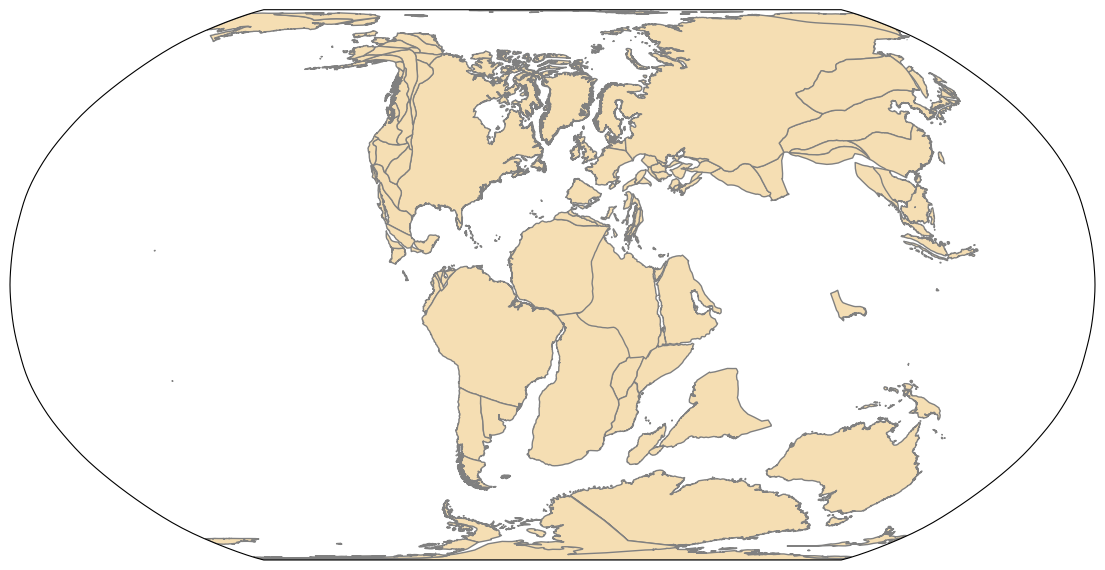

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import cartopy.feature as cfeature
import numpy as np
%matplotlib inline

fig = plt.figure(figsize=(14,10))
ax_map = fig.add_subplot(111, projection=ccrs.Robinson())

shp_coast = shpreader.Reader(output_reconstructed_feature_filename)
ft_coast = cfeature.ShapelyFeature(shp_coast.geometries(), crs=ccrs.PlateCarree())

ax_map.add_feature(ft_coast, facecolor='Wheat', edgecolor='Grey')

In [32]:
import pygplates
import sys,os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon

import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
from shapely.geometry import MultiLineString

# import plate_tectonic_utils, velocity_utils

data_root = 'data/workshop/'
coastlines_filename = data_root+'Coastlines/Global_coastlines_2015_v1_low_res.shp'
continental_polygons_filename = data_root+'ContinentalPolygons/Seton_etal_ESR2012_ContinentalPolygons_2012.1.gpmlz'
topology_filenames = []
topology_filenames.append(data_root+'Global_EarthByte_Mesozoic-Cenozoic_plate_boundaries_Matthews_etal.gpml')
topology_filenames.append(data_root+'Global_EarthByte_Paleozoic_plate_boundaries_Matthews_etal.gpml')
fracture_zones_filename = data_root + 'Fracture_zones/Fracture_zones_workshop.shp'
magnetic_picks_filenames = []
magnetic_picks_filenames.append(data_root+'GSFML.IndianOcean/GSFML.IndianOcean.picks_ws.shp')
magnetic_picks_filenames.append(data_root+'GSFML.AtlanticOcean/GSFML.AtlanticOcean.picks_ws.shp')
magnetic_picks_filenames.append(data_root+'GSFML.MarginalBackarcBasins/GSFML.Marginal_BackarcBasins.picks_ws.shp')
magnetic_picks_filenames.append(data_root+'GSFML.PacificOcean/GSFML.PacificOcean.picks_ws.shp')
cob_filename = data_root + 'ContinentOceanBoundaries/Shapefile/Seton_etal_ESR2012_ContinentOceanBoundaries_2012.1_ws.shp'
mineral_filename = data_root + 'mrds/test.shp'
mineral_AU_filename = data_root + 'mrds/AU_deposits.shp'

rotation_filenames = []
rotation_filenames.append(data_root+'Global_EB_250-0Ma_GK07_Matthews_etal.rot')
rotation_filenames.append(data_root+'Global_EB_410-250Ma_GK07_Matthews_etal.rot')

# Base name of ouput file.
coastlines_output_basename = 'tmp/coastlines'
continental_polygons_output_basename = 'tmp/continental'
topology_output_basename = 'tmp/topology'
fracture_zones_output_basename = 'tmp/fracture'
magnetic_picks_output_basename = 'tmp/magnetic'
cob_output_basename = 'tmp/cob'
mineral_output_basename = 'tmp/mineral'
mineral_AU_output_basename = 'tmp/mineral_au'

def make_GPML_velocity_feature(Long,Lat):
# function to make a velocity mesh nodes at an arbitrary set of points defined in Lat
# Long and Lat are assumed to be 1d arrays.

    # Add points to a multipoint geometry
    multi_point = pygplates.MultiPointOnSphere([(float(lat),float(lon)) for lat, lon in zip(Lat,Long)])

    # Create a feature containing the multipoint feature, and defined as MeshNode type
    meshnode_feature = pygplates.Feature(pygplates.FeatureType.create_from_qualified_string('gpml:MeshNode'))
    meshnode_feature.set_geometry(multi_point)
    meshnode_feature.set_name('Velocity Mesh Nodes from pygplates')

    output_feature_collection = pygplates.FeatureCollection(meshnode_feature)

    # NB: at this point, the feature could be written to a file using
    # output_feature_collection.write('myfilename.gpmlz')

    # for use within the notebook, the velocity domain feature is returned from the function
    return output_feature_collection


def Get_Plate_Velocities(velocity_domain_features, topology_features, rotation_model, time, delta_time, rep='vector_comp'):
    # All domain points and associated (magnitude, azimuth, inclination) velocities for the current time.
    all_domain_points = []
    all_velocities = []

    # Partition our velocity domain features into our topological plate polygons at the current 'time'.
    plate_partitioner = pygplates.PlatePartitioner(topology_features, rotation_model, time)

    for velocity_domain_feature in velocity_domain_features:

        # A velocity domain feature usually has a single geometry but we'll assume it can be any number.
        # Iterate over them all.
        for velocity_domain_geometry in velocity_domain_feature.get_geometries():

            for velocity_domain_point in velocity_domain_geometry.get_points():

                all_domain_points.append(velocity_domain_point)

                partitioning_plate = plate_partitioner.partition_point(velocity_domain_point)
                if partitioning_plate:

                    # We need the newly assigned plate ID to get the equivalent stage rotation of that tectonic plate.
                    partitioning_plate_id = partitioning_plate.get_feature().get_reconstruction_plate_id()

                    # Get the stage rotation of partitioning plate from 'time + delta_time' to 'time'.
                    equivalent_stage_rotation = rotation_model.get_rotation(time, partitioning_plate_id, time + delta_time)

                    # Calculate velocity at the velocity domain point.
                    # This is from 'time + delta_time' to 'time' on the partitioning plate.
                    velocity_vectors = pygplates.calculate_velocities(
                        [velocity_domain_point],
                        equivalent_stage_rotation,
                        delta_time)

                    if rep=='mag_azim':
                        # Convert global 3D velocity vectors to local (magnitude, azimuth, inclination) tuples (one tuple per point).
                        velocities = pygplates.LocalCartesian.convert_from_geocentric_to_magnitude_azimuth_inclination(
                            [velocity_domain_point],
                            velocity_vectors)
                        all_velocities.append(velocities[0])

                    elif rep=='vector_comp':
                        # Convert global 3D velocity vectors to local (magnitude, azimuth, inclination) tuples (one tuple per point).
                        velocities = pygplates.LocalCartesian.convert_from_geocentric_to_north_east_down(
                                [velocity_domain_point],
                                velocity_vectors)
                        all_velocities.append(velocities[0])

                else:
                    all_velocities.append((0,0,0))

    return all_velocities

def get_colour_by_plateid(plate_id):
    from matplotlib import colors
    converter = colors.ColorConverter()
    plateid_colours = {
        0: list(converter.to_rgba('yellow',alpha=1.0)),
        1: list(converter.to_rgba('aqua',alpha=1.0)),
        2: list(converter.to_rgba('seagreen',alpha=1.0)),
        3: list(converter.to_rgba('fuchsia',alpha=1.0)),
        4: list(converter.to_rgba('slategray',alpha=1.0)),
        5: list(converter.to_rgba('lime',alpha=1.0)),
        6: list(converter.to_rgba('indigo',alpha=1.0)),
        7: list(converter.to_rgba('red',alpha=1.0)),
        8: list(converter.to_rgba('orange',alpha=1.0)),
        9: list(converter.to_rgba('lightsalmon',alpha=1.0)),
        10: list(converter.to_rgba('navy',alpha=1.0)),
    }
    return plateid_colours[plate_id%11]

class Tutorial(object):
    def __init__(self):
        self.reconstruction_time = 0.
        self.anchor_plate = 0
        self.delta_time = 5.
        Path("./tmp").mkdir(parents=True, exist_ok=True)
        if not os.path.isdir('data'):
            raise Exception('The Data folder is not found! Try `ln -s ../data Data` in the "notebooks" folder.')


    def reconstruct_coastlines(self):
        #
        #-----------Use pygplates to carry out the reconstruction
        #
        print('Reconstructing coastlines...')
        pygplates.reconstruct(
                coastlines_filename,
                rotation_filenames,
                coastlines_output_basename+'.shp',
                self.reconstruction_time,
                self.anchor_plate)

    def reconstruct_continental_polygons(self):
        #
        #-----------Use pygplates to carry out the reconstruction
        #
        print('Reconstructing continental polygons...')
        pygplates.reconstruct(
                continental_polygons_filename,
                rotation_filenames,
                continental_polygons_output_basename+'.shp',
                self.reconstruction_time,
                self.anchor_plate)

    def reconstruct_mineral_deposits(self):
        pygplates.reconstruct(
                mineral_filename,
                rotation_filenames,
                mineral_output_basename+'.shp',
                self.reconstruction_time,
                self.anchor_plate)

        pygplates.reconstruct(
                mineral_AU_filename,
                rotation_filenames,
                mineral_AU_output_basename+'.shp',
                self.reconstruction_time,
                self.anchor_plate)

    def reconstruct_topologies(self):
        print('Resolving topologies')
        rotation_model = pygplates.RotationModel(rotation_filenames)
        pygplates.resolve_topologies(
                topology_filenames,
                rotation_model,
                topology_output_basename+'.shp',
                self.reconstruction_time)


    def reconstruct_fracture_zones(self):
        # Use pygplates to carry out the reconstruction
        print('Reconstructing fracture zones...')
        pygplates.reconstruct(
                fracture_zones_filename,
                rotation_filenames,
                fracture_zones_output_basename+'.shp',
                self.reconstruction_time,
                self.anchor_plate)


    def reconstruct_continent_ocean_boundaries(self):
        # Use pygplates to carry out the reconstruction
        pygplates.reconstruct(
                cob_filename,
                rotation_filenames,
                cob_output_basename+'.shp',
                self.reconstruction_time,
                self.anchor_plate)


    def reconstruct_magnetic_picks(self):
        sys.stdout.flush()
        cnt=0
        for filename in magnetic_picks_filenames:
            cnt+=1
            # Use pygplates to carry out the reconstruction
            print('Reconstructing magnetic picks in {}'.format(filename) )
            sys.stdout.flush()
            pygplates.reconstruct(
                    filename,
                    rotation_filenames,
                    magnetic_picks_output_basename+'_{}.shp'.format(cnt),
                    self.reconstruction_time,
                    self.anchor_plate)


    def plot_continental_polygons(self, ax, facecolor=None, edgecolor='none', alpha=0.1):
        print('Plotting continental polygons...')
        shape_feature = ShapelyFeature(Reader(continental_polygons_output_basename).geometries(),
                                ccrs.PlateCarree(), edgecolor=edgecolor)
        ax.add_feature(shape_feature,facecolor=facecolor, alpha=alpha)



    def plot_coastlines(self, ax, facecolor='default', edgecolor='k', alpha=0.4):
        print('Plotting coastlines...')

        for record in Reader(coastlines_output_basename+'.shp').records():
            #print(record.attributes)
            fc = facecolor
            if facecolor == 'default':
                fc = get_colour_by_plateid(int(record.attributes['PLATEID1']))

            shape_feature = ShapelyFeature([record.geometry], ccrs.PlateCarree(), edgecolor=edgecolor)
            ax.add_feature(shape_feature,facecolor=fc, alpha=alpha)


    def plot_topologies(self, ax, facecolor='default', edgecolor='w', alpha=0.2):
        print('Plotting topologies...')

        for record in Reader(topology_output_basename+'.shp').records():
            #print(record.attributes)
            fc = facecolor
            if facecolor == 'default':
                fc = get_colour_by_plateid(int(record.attributes['PLATEID1']))

            shape_feature = ShapelyFeature([record.geometry], ccrs.PlateCarree(), edgecolor=edgecolor)
            ax.add_feature(shape_feature,facecolor=fc, alpha=alpha)


    def plot_fracture_zones(self, ax, color='default'):
        #plot the fracture zones
        print('Plotting fracture zones...')

        for record in Reader(fracture_zones_output_basename+'.shp').records():
            #print(record.geometry)
            c=color
            if color == 'default':
                c = get_colour_by_plateid(int(record.attributes['PLATEID1']))

            if type(record.geometry) is MultiLineString:
                for line in record.geometry:
                    lon, lat = line.xy
                    ax.plot(lon,lat,transform=ccrs.Geodetic(),color=c)
            else:
                lon, lat = record.geometry.xy
                ax.plot(lon,lat,transform=ccrs.Geodetic(),color=c)



    def plot_continent_ocean_boundaries(self, ax, color='default'):
        #plot the continent_ocean_boundaries

        for record in Reader(cob_output_basename+'.shp').records():
            #print(record.geometry)
            c = color
            if color == 'default':
                c = get_colour_by_plateid(int(record.attributes['PLATEID1']))

            if type(record.geometry) is MultiLineString:
                for line in record.geometry:
                    lon, lat = line.xy
                    ax.plot(lon,lat,transform=ccrs.Geodetic(),color=c)
            else:
                lon, lat = record.geometry.xy
                ax.plot(lon,lat,transform=ccrs.Geodetic(),color=c)




    def plot_magnetic_picks(self, ax, facecolors='none'):
        for i in range(1,5):
            reader = Reader(f'{magnetic_picks_output_basename}_{i}'+'.shp')
            #m.readshapefile(magnetic_picks_output_basename+'_{}'.format(i) ,'magnetic_{}'.format(i),drawbounds=False,color='w')
            import hashlib
            colors=[]
            lons=[]
            lats=[]
            for s in reader.records():
                if all(k in s.attributes for k in ['Chron', 'AnomalyEnd']):
                    #not really colouring by plate id. In fact, it is colouring by Chron+AnomalyEnd
                    colors.append(
                        get_colour_by_plateid(
                            int(hashlib.sha1(
                                (s.attributes['Chron']+s.attributes['AnomalyEnd']).encode('utf-8')).hexdigest(), 16)))
                else:
                    colors.append(
                        get_colour_by_plateid(0))
                lons.append(s.geometry.x)
                lats.append(s.geometry.y)

            ax.scatter(
                lons,
                lats,
                facecolors='none',
                edgecolor=colors,
                transform=ccrs.PlateCarree(),
                #s=.1,
                zorder=99)



    def plot_mineral_deposits(self, ax, facecolors='none'):
        reader = Reader(mineral_output_basename+'.shp')

        ax.scatter(
                [point.x for point in reader.geometries()],
                [point.y for point in reader.geometries()],
                facecolors=facecolors,
                transform=ccrs.PlateCarree(),
                edgecolors='black',
                s=30,
                zorder=99)

        reader_au = Reader(mineral_AU_output_basename)

        ax.scatter(
                [point.x for point in reader_au.geometries()],
                [point.y for point in reader_au.geometries()],
                facecolors=facecolors,
                edgecolors='gold',
                transform=ccrs.PlateCarree(),
                s=30,
                zorder=99)


    def plot_velocities(self, ax):
        delta_time = 5.
        Xnodes = np.arange(-180,180,5)
        Ynodes = np.arange(-90,90,5)
        Xg,Yg = np.meshgrid(Xnodes,Ynodes)
        Xg = Xg.flatten()
        Yg = Yg.flatten()
        velocity_domain_features = make_GPML_velocity_feature(Xg,Yg)
        # Load one or more rotation files into a rotation model.
        rotation_model = pygplates.RotationModel(rotation_filenames)

        # Load the topological plate polygon features.
        topology_features = []
        for fname in topology_filenames:
            for f in pygplates.FeatureCollection(fname):
                topology_features.append(f)


        # Call the function we created above to get the velocities
        all_velocities = Get_Plate_Velocities(velocity_domain_features,
                                              topology_features,
                                              rotation_model,
                                              self.reconstruction_time,
                                              delta_time,
                                              'vector_comp')

        uu=[]
        vv=[]
        for vel in all_velocities:
            if not hasattr(vel, 'get_y'):
                uu.append(vel[1])
                vv.append(vel[0])
            else:
                uu.append(vel.get_y())
                vv.append(vel.get_x())
        u = np.asarray([uu]).reshape((Ynodes.shape[0],Xnodes.shape[0]))
        v = np.asarray([vv]).reshape((Ynodes.shape[0],Xnodes.shape[0]))

        Q = ax.quiver(Xnodes,Ynodes,u,v,scale=1000,color='grey',transform = ccrs.PlateCarree(), regrid_shape=20)
        # make quiver key.
        qk = plt.quiverkey(Q, 0.95, 1.05, 50, '50 mm/yr', labelpos='W')



    def create_map(self, name, lon=0):
        if name == 'mollweide':
            ax = plt.axes(projection=ccrs.Mollweide(central_longitude=lon))
        elif name == 'robinson':
            ax = plt.axes(projection=ccrs.Robinson(central_longitude=lon))
        else: #'rectangular' and by default
            ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=lon))
        ax.gridlines()
        ax.set_global()
        return ax


    def plot_layers(self, layers, ax):
        for layer in layers:
            if layer == 'coastlines':
                self.reconstruct_coastlines()
                self.plot_coastlines(ax)
            elif layer == 'continental_polygons':
                self.reconstruct_continental_polygons()
                self.plot_continental_polygons(ax)
            elif layer == 'topologies':
                self.reconstruct_topologies()
                self.plot_topologies(ax)
            elif layer == 'fracture':
                self.reconstruct_fracture_zones()
                self.plot_fracture_zones(ax)
            elif layer == 'magnetic':
                self.reconstruct_magnetic_picks()
                self.plot_magnetic_picks(ax)
            elif layer == 'cob':
                self.reconstruct_continent_ocean_boundaries()
                self.plot_continent_ocean_boundaries(ax)
            elif layer == 'mineral':
                self.reconstruct_mineral_deposits()
                self.plot_mineral_deposits(ax)
            elif layer == 'velocities':
                self.plot_velocities(ax)


    def plot_earthquakes(self, ax, minmag=0.0, maxmag=100.0):
        earthquakes = pygplates.FeatureCollection('data/workshop/Earthquakes/earthquakes_new1.shp')

        cm = plt.cm.get_cmap('gnuplot')

        colors = []
        pt_lon = []
        pt_lat = []
        sizes = []
        magnitudes = []
        for q in earthquakes:
            mag = float(q.get_name())

            if mag < minmag:
                continue

            if mag > maxmag:
                continue

            pt = q.get_geometry()
            pt_lon.append(pt.to_lat_lon()[1])
            pt_lat.append(pt.to_lat_lon()[0])

            colors.append(mag)
            sizes.append(35)
            magnitudes.append(mag)

        #x, y = m(pt_lon,pt_lat)

        sc = ax.scatter(
            pt_lon,
            pt_lat,
            c=colors,
            s=sizes,
            transform=ccrs.PlateCarree(),
            vmin=min(magnitudes),
            vmax=max(magnitudes),
            cmap=cm,
            linewidths=0,
            zorder=2
        )

        cbar = plt.colorbar(sc)
        cbar.ax.set_ylabel('Richter magnitude')

# Setup code. Don't worry too much about this.
%matplotlib inline
import matplotlib.pyplot as plt
import pygplates
import sys
# sys.path.append('../libs/')
# from tut import Tutorial
tutorial = Tutorial()

Reconstructing coastlines...
Plotting coastlines...


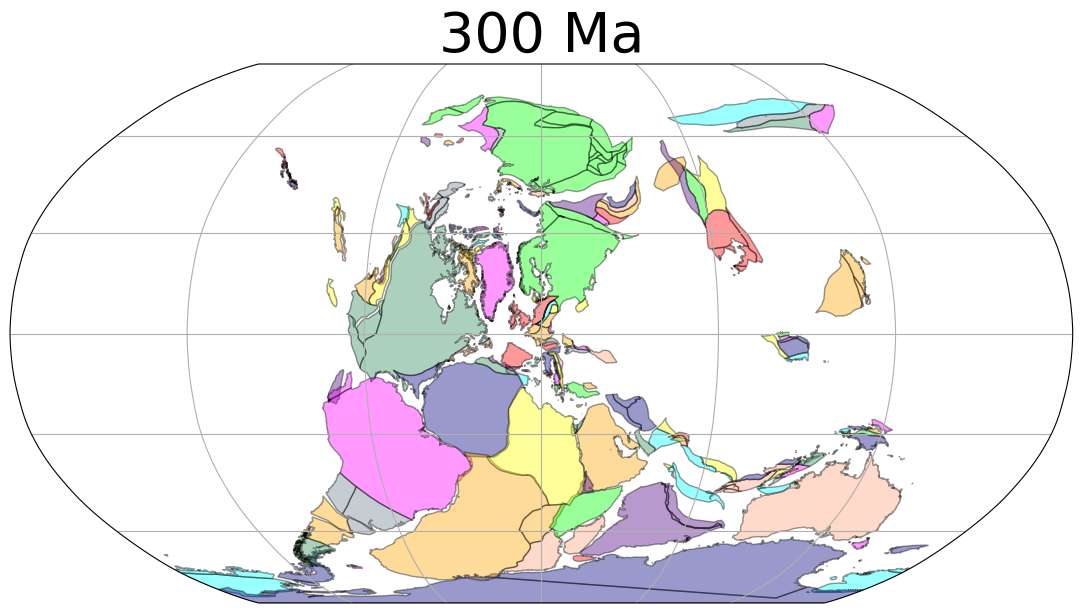

In [ ]:
# Set the reconstruction time
# This is the number of million years in the past, so 300 means to
# predict 300 million years into the past (or 300Ma).
# You can go as far back as 400Ma
tutorial.reconstruction_time = 300

# Set up the figure
fig = plt.figure(figsize=(14,7))
#fig.add_axes([0,0,0.9,1.0])

# Projections are rectangular, mollweide or robinson
ax = tutorial.create_map('robinson')
#ax = tutorial.create_map('mollweide')
#ax = tutorial.create_map('rectangular')

# Remember, you can hide a layer by putting # in front of it
layers = [
    'coastlines',
    #'continental_polygons',
    #'topologies',
    #'fracture',
    #'magnetic',
    #'cob',
    #'mineral',
    #'velocities'
]

tutorial.plot_layers(layers, ax)
plt.title('%d Ma' % tutorial.reconstruction_time, fontsize=40)
plt.show()

Reconstructing coastlines...
Plotting coastlines...
Resolving topologies
Plotting topologies...


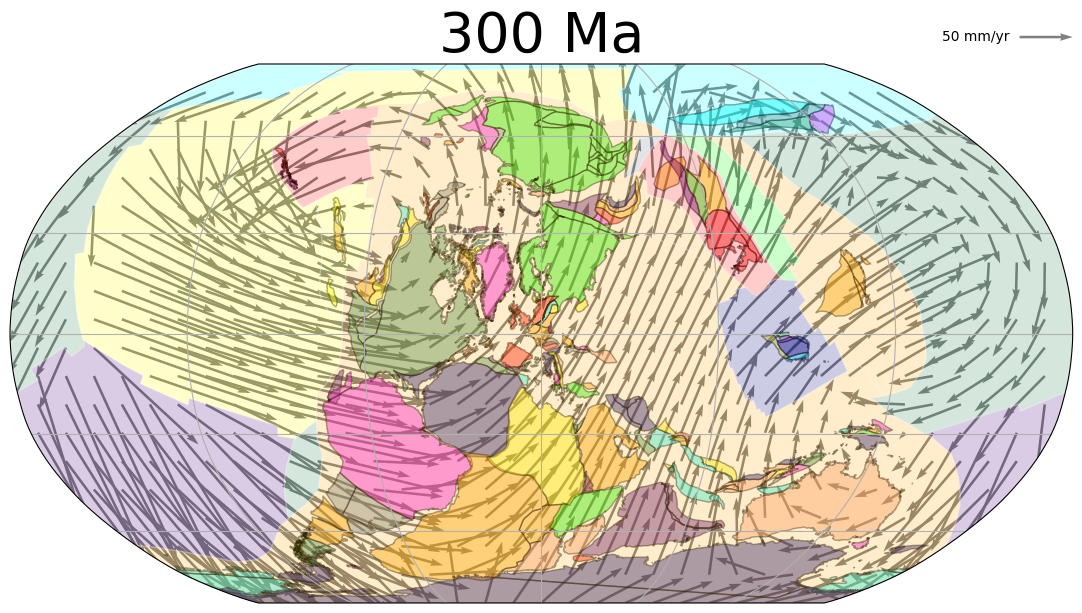

In [ ]:
# Set the reconstruction time
# This is the number of million years in the past, so 300 means to
# predict 300 million years into the past (or 300Ma).
# You can go as far back as 400Ma
tutorial.reconstruction_time = 300

# Set up the figure
fig = plt.figure(figsize=(14,7))
#fig.add_axes([0,0,0.9,1.0])

# Projections are rectangular, mollweide or robinson
ax = tutorial.create_map('robinson')

# Remember, you can hide a layer by putting # in front of it
layers = [
    'coastlines',
    #'continental_polygons',
    'topologies',
    #'fracture',
    #'magnetic',
    #'cob',
    'velocities'
]

tutorial.plot_layers(layers, ax)
plt.title('%d Ma' % tutorial.reconstruction_time, fontsize=40)
plt.show()

Reconstructing coastlines...
Plotting coastlines...
Resolving topologies
Plotting topologies...


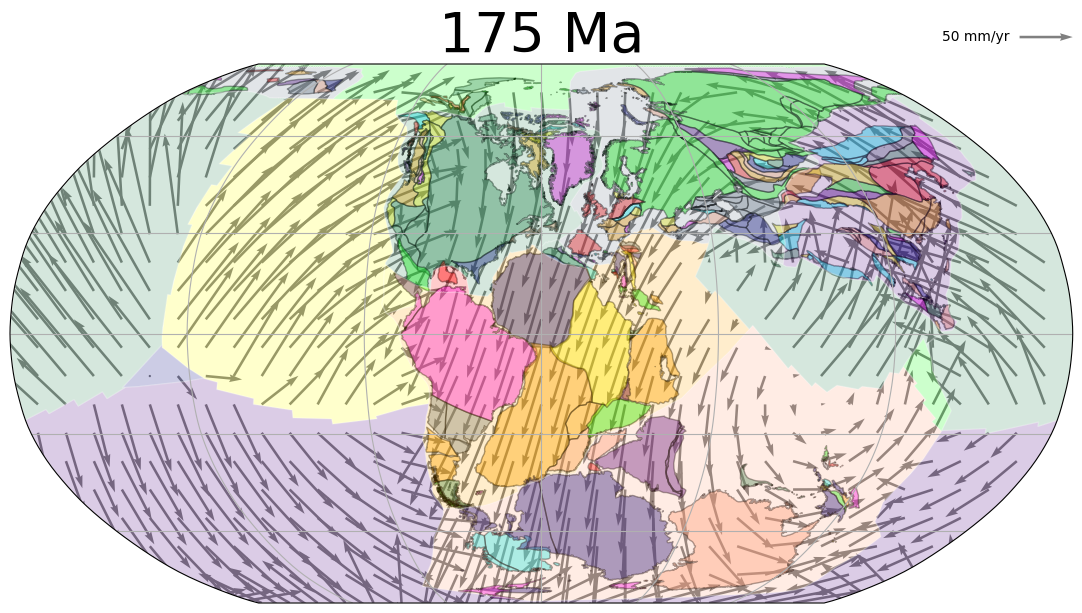

In [ ]:
# Set the reconstruction time
tutorial.reconstruction_time = 175

# Set up the figure
fig = plt.figure(figsize=(14,7))
#fig.add_axes([0,0,0.9,1.0])

# Projections are rectangular, mollweide or robinson
ax = tutorial.create_map('robinson')

# Remember, you can hide a layer by putting # in front of it
layers = [
    'coastlines',
    #'continental_polygons',
    'topologies',
    #'fracture',
    #'magnetic',
    #'cob',
    #'mineral',
    'velocities'
]

tutorial.plot_layers(layers, ax)
plt.title('%d Ma' % tutorial.reconstruction_time, fontsize=40)
plt.show()

In [ ]:
def reconstructTime(time):
    tutorial.reconstruction_time = time

    # Set up the figure
    fig = plt.figure(figsize=(14,7))
    #fig.add_axes([0,0,0.9,1.0])

    # Projections are rectangular, mollweide or robinson
    ax = tutorial.create_map('robinson')
    #ax = tutorial.create_map('mollweide')
    #ax = tutorial.create_map('rectangular')

    # Remember, you can hide a layer by putting # in front of it
    layers = [
        'coastlines',
        #'continental_polygons',
        #'topologies',
        #'fracture',
        #'magnetic',
        #'cob',
        #'mineral',
        #'velocities'
    ]

    tutorial.plot_layers(layers, ax)
    plt.title('%d Ma' % tutorial.reconstruction_time, fontsize=40)
    plt.show()

Reconstructing coastlines...
Plotting coastlines...


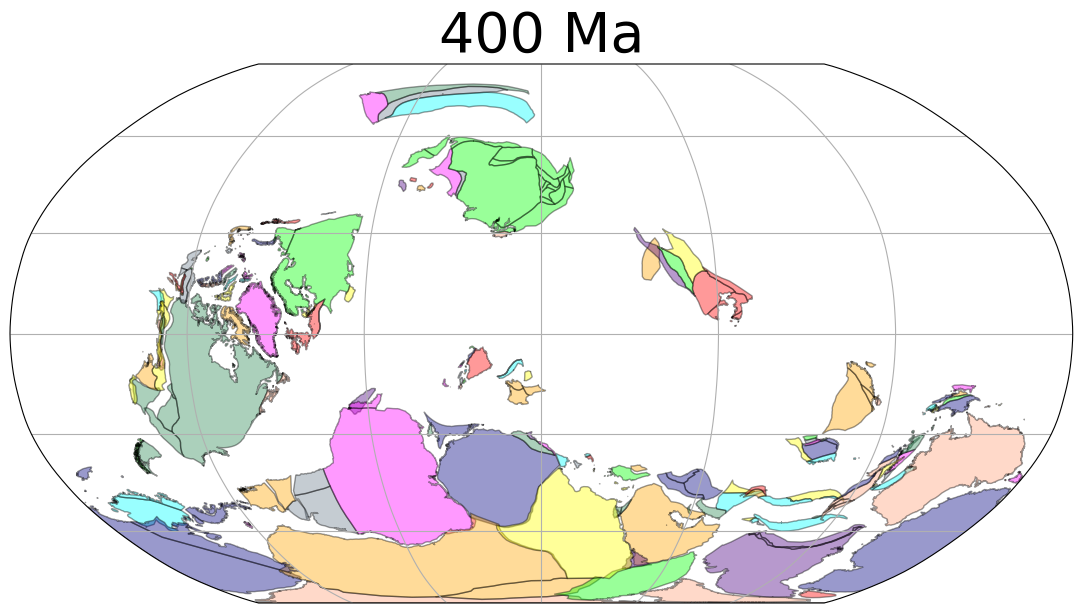

In [ ]:
reconstructTime(400)

Reconstructing coastlines...
Plotting coastlines...


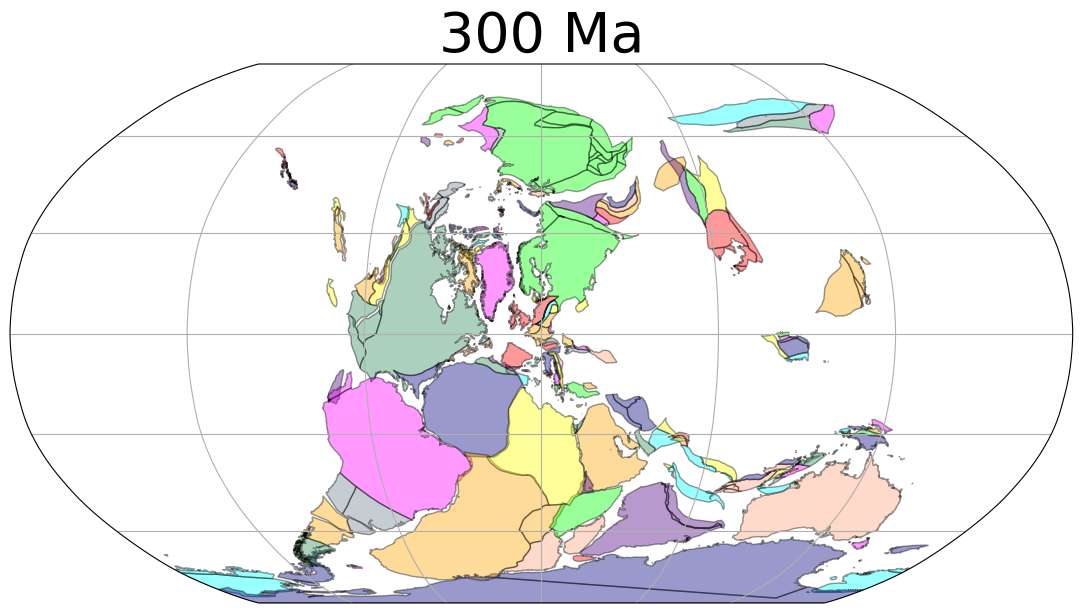

In [ ]:
reconstructTime(300)

Reconstructing coastlines...
Plotting coastlines...


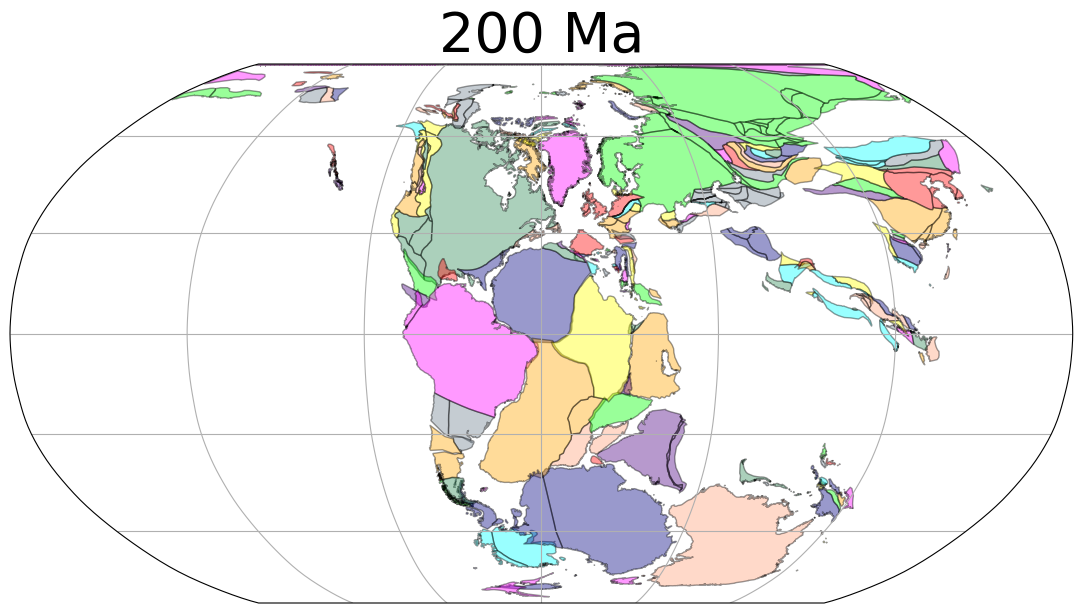

In [ ]:
reconstructTime(200)

Reconstructing coastlines...
Plotting coastlines...


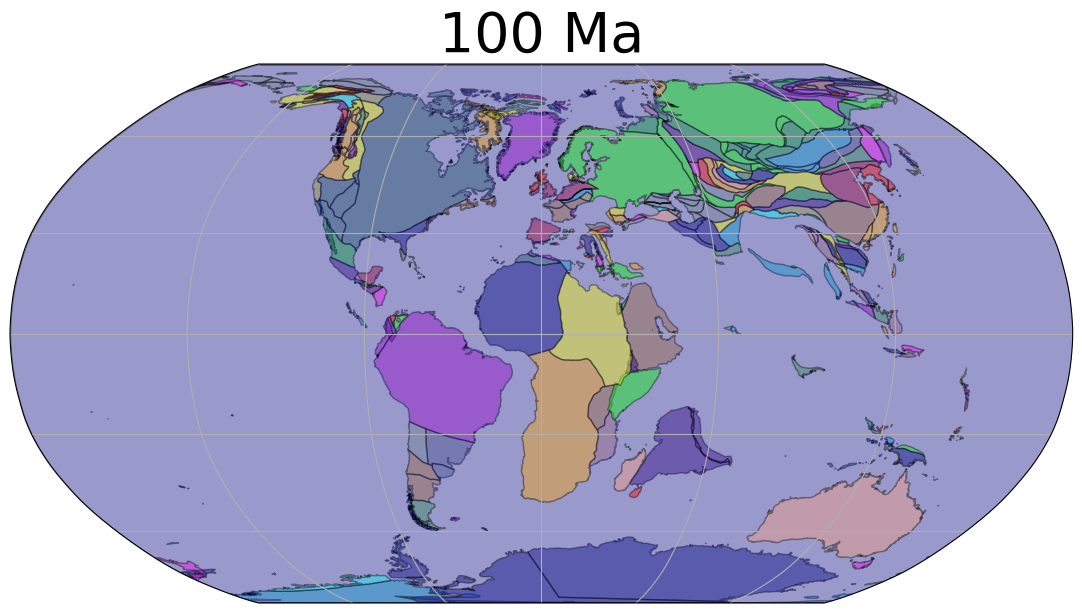

In [ ]:
reconstructTime(100)

Reconstructing coastlines...
Plotting coastlines...


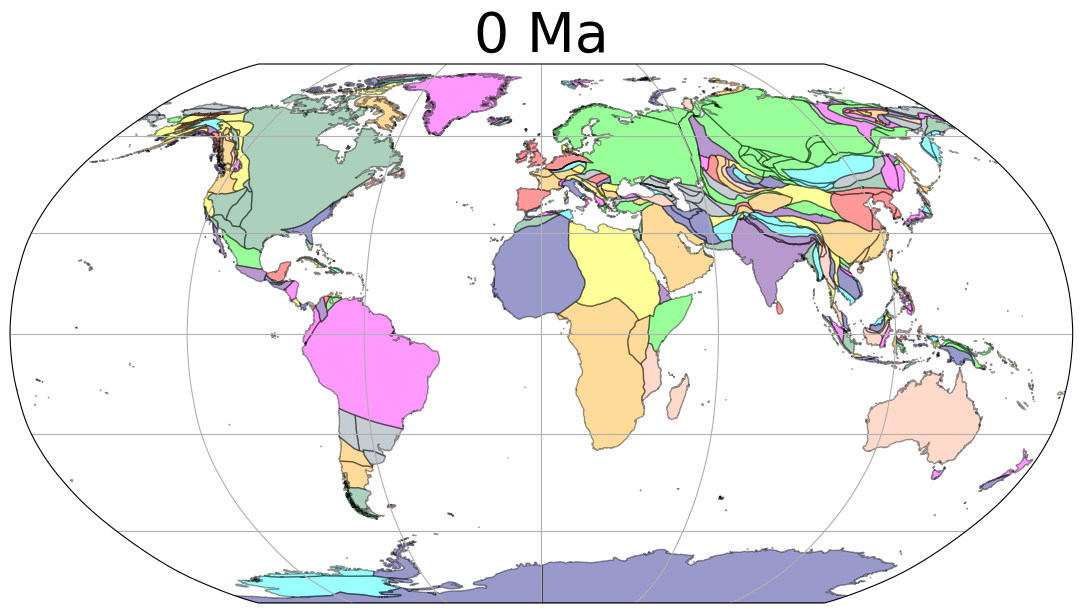

In [ ]:
reconstructTime(0)

In [8]:
pm_manager = PlateModelManager()
for name in pm_manager.get_available_model_names():
    print(name)

default
alfonso2024
cao2024
cao2023
muller2022
zahirovic2022
merdith2021
clennett2020
clennett2020_m2019
clennett2020_s2013
muller2019
young2018
torsvikcocks2017
matthews2016
matthews2016_mantle_ref
matthews2016_pmag_ref
muller2016
scotese2016
zahirovic2016
gibbons2015
domeier2014
zahirovic2014
shephard2013
gurnis2012
seton2012
li2008
muller2008
golonka
paleomap
rodinia


In [9]:
model = pm_manager.get_model("Muller2019")
model.set_data_dir("plate-models-data-dir")
print(model.get_rotation_model())
print(model.get_coastlines())
#print(model.get_topologies())
! ls -rthl plate-models-data-dir/muller2019

['plate-models-data-dir/muller2019//Rotations/Muller_etal_2019_CombinedRotations.rot']
['plate-models-data-dir/muller2019//Coastlines/Muller_etal_2019_Global_Coastlines.gpmlz']
total 8.0K
drwxr-xr-x 2 root root 4.0K Jan 24 17:03 Rotations
drwxr-xr-x 2 root root 4.0K Jan 24 17:03 Coastlines


In [10]:
import pygplates
# let's define a function to reconstruct one location
def reconstruct_location(lat, lon , model, time=100):
    # create a point feature at (lat,lon)
    point_feature = pygplates.Feature()
    point_feature.set_geometry(pygplates.PointOnSphere(lat, lon))

    # assign plate ID
    point_feature_with_PID = pygplates.partition_into_plates(model.get_static_polygons(),
                                                           model.get_rotation_model(),
                                                           [point_feature])
    # Reconstruct the point features.
    reconstructed_feature_geometries = []
    pygplates.reconstruct(point_feature_with_PID, model.get_rotation_model(),
                          reconstructed_feature_geometries, time)

    if len(reconstructed_feature_geometries)==1:
        return reconstructed_feature_geometries[0].get_reconstructed_geometry().to_lat_lon()
    else:
        return None

In [11]:
time=140
lat_0=0
lon_0=0

model = pm_manager.get_model("muller2019")
model.set_data_dir("plate-models-data-dir")
muller2019_0_0 = reconstruct_location(lat_0,lon_0,model,time=time)

model = pm_manager.get_model("merdith2021")
model.set_data_dir("plate-models-data-dir")
merdith2021_0_0 = reconstruct_location(lat_0,lon_0,model, time=time)

model = pm_manager.get_model("seton2012")
model.set_data_dir("plate-models-data-dir")
seton2012_0_0 = reconstruct_location(lat_0,lon_0,model,time=time)

/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip


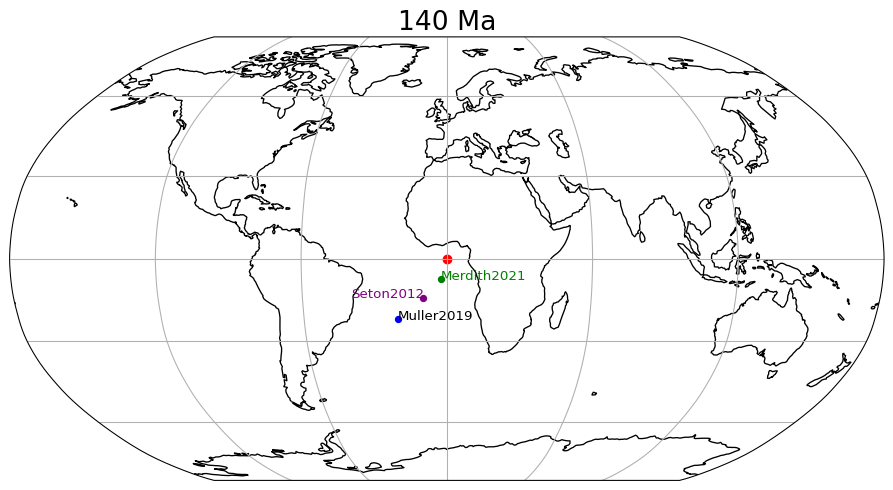

In [12]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

crs = ccrs.Robinson(central_longitude=0.0, globe=None)
fig = plt.figure(figsize=(12, 6), dpi=96)
ax = plt.axes(projection=crs)
ax.gridlines()
ax.set_global()
ax.coastlines()

ax.scatter(
    [lon_0],
    [lat_0],
    color="red",
    transform=ccrs.PlateCarree(),
    s=40
)

ax.scatter(
    [muller2019_0_0[1]],
    [muller2019_0_0[0]],
    color="blue",
    transform=ccrs.PlateCarree(),
    s=20
)
ax.text(muller2019_0_0[1], muller2019_0_0[0], "Muller2019", transform=ccrs.PlateCarree(), fontsize=10)

ax.scatter(
    [merdith2021_0_0[1]],
    [merdith2021_0_0[0]],
    color="green",
    transform=ccrs.PlateCarree(),
    s=20
)
ax.text(merdith2021_0_0[1], merdith2021_0_0[0], "Merdith2021", transform=ccrs.PlateCarree(), fontsize=10, color="green")

ax.scatter(
    [seton2012_0_0[1]],
    [seton2012_0_0[0]],
    color="purple",
    transform=ccrs.PlateCarree(),
    s=20
)
ax.text(seton2012_0_0[1]-30, seton2012_0_0[0], "Seton2012", transform=ccrs.PlateCarree(), fontsize=10, color="purple")


plt.title(f"{time} Ma", fontsize=20)


plt.show()

In [13]:
import numpy as np
import pygplates

# Rotation file to be used to generate synthetic flowlines
rotation_filename = 'data/Seton_etal_ESR2012_2012.1.rot'

# Parameters required to define a flowline (as in GPlates)
SeedPoints = zip([-40,-43],[157,157.5])
left_plate = 801
right_plate = 833
times = np.arange(0,90,1.)

In [14]:
multi_point = pygplates.MultiPointOnSphere(SeedPoints)

# Create the flowline feature
flowline_feature = pygplates.Feature.create_flowline(
    multi_point,
    times,
    valid_time=(np.max(times), np.min(times)),
    left_plate=left_plate,
    right_plate=right_plate)

In [15]:
# Load a rotation model (required to generate a synthetic flowline)
rotation_model=pygplates.RotationModel(rotation_filename)

# reconstruct the flowline - we want it in present day coordinates
reconstruction_time=0

# create an empty feature in which the reconstructed flowline geometries will be placed
reconstructed_flowlines = []

# call pygplates to generate the flowline feature
pygplates.reconstruct(flowline_feature, rotation_model, reconstructed_flowlines, reconstruction_time,
                  anchor_plate_id=1, reconstruct_type=pygplates.ReconstructType.flowline)

/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_ocean.zip
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_lakes.zip


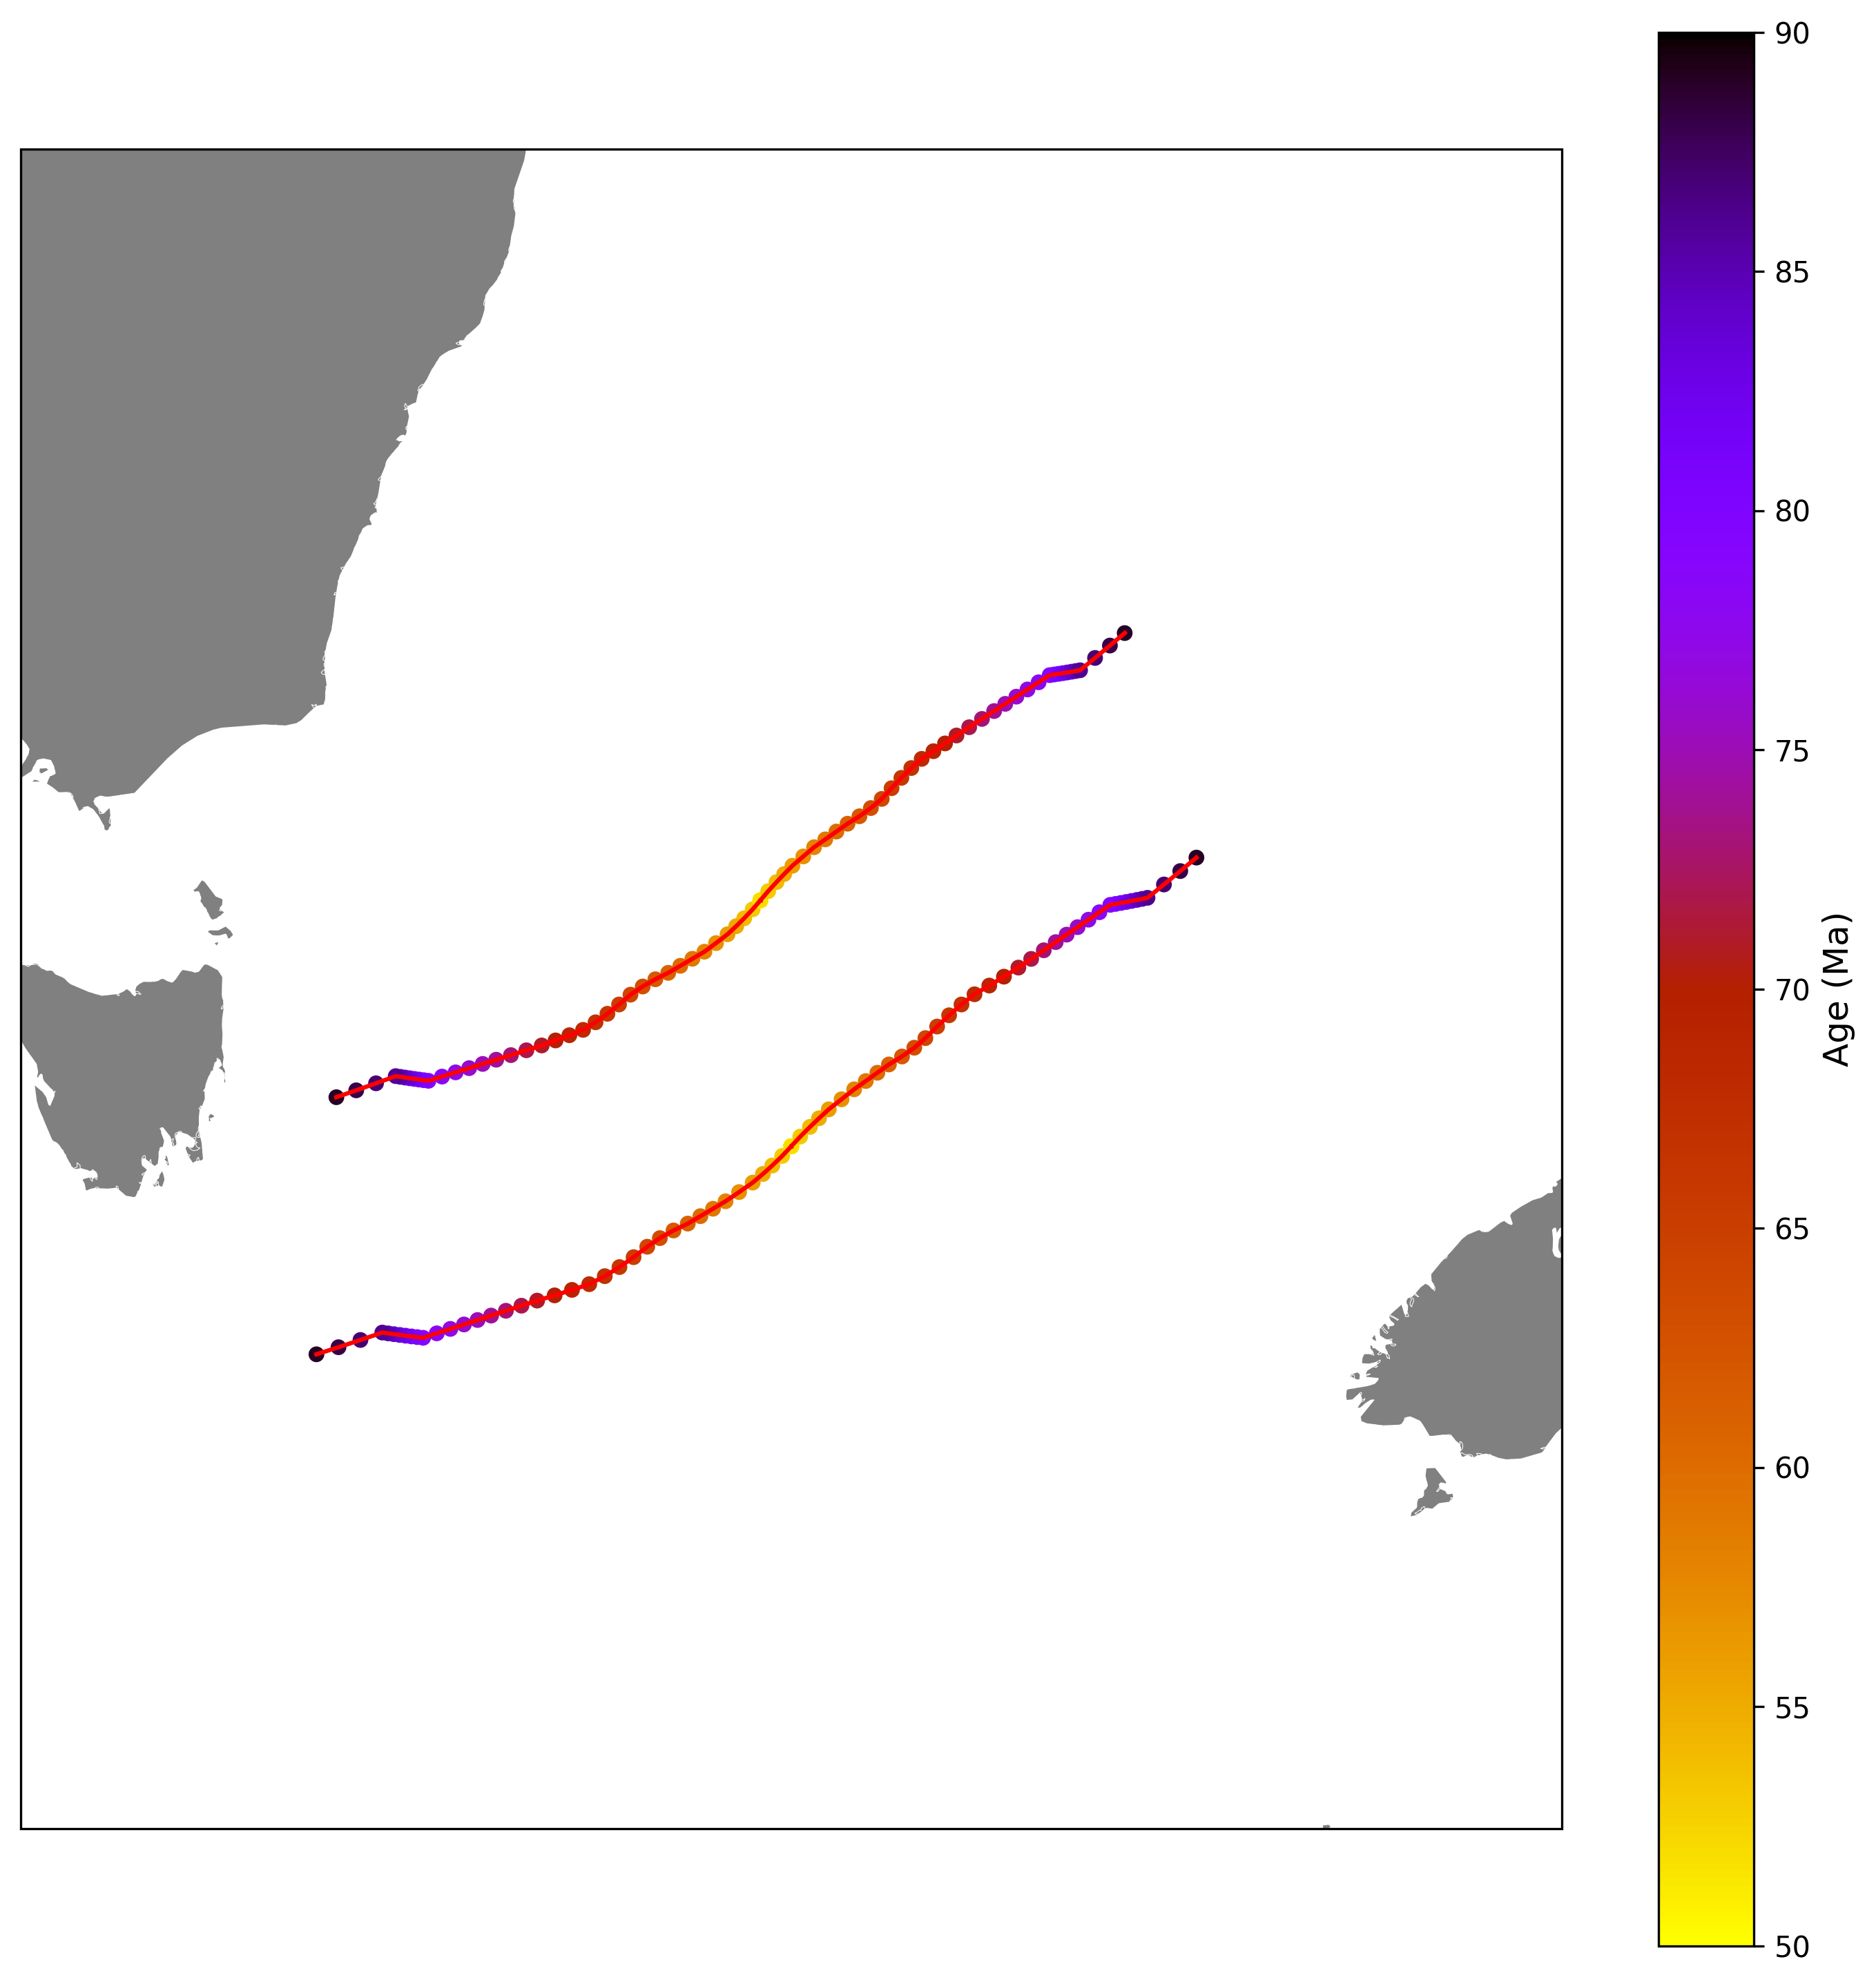

In [16]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import numpy as np
%matplotlib inline

# Create figure
fig = plt.figure(figsize=(12,12),dpi=300)
pmap = fig.add_subplot(111, projection=ccrs.Mercator())
pmap.set_extent([145, 170, -50, -30])

# Create land and ocean features in greyscale
pmap.coastlines(resolution='10m', color='white', linewidth=0.25)
pmap.add_feature(cfeature.LAND, color = 'grey', edgecolor='grey')
pmap.add_feature(cfeature.OCEAN, color='white')
pmap.add_feature(cfeature.LAKES, color='white', edgecolor='white')

# Iterate over the left and right sides that the flowline is split into.
for reconstructed_flowline in reconstructed_flowlines:

    # Iterate over the left flowline points
    # Create an empty array to hold left flowline points which we append over.
    flowlinearray_left = np.empty([0,0])
    # Access each left flowline from an array holding the flowline spread along the *left* plate from the
    # reconstructed seed point.
    for left_point in reconstructed_flowline.get_left_flowline():
        # Append the initially empty flowlinearray_left array with the left points obtained from reconstructed_flowline
        # which have been turned into values of a lat-lon array.
        flowlinearray_left = np.append(flowlinearray_left, left_point.to_lat_lon_array())

    # Repeat this iteration for the right flowline points.
    flowlinearray_right = np.empty([0,0])
    for right_point in reconstructed_flowline.get_right_flowline():
        flowlinearray_right = np.append(flowlinearray_right, right_point.to_lat_lon_array())

    x,y = flowlinearray_left[1::2],flowlinearray_left[::2]

    l1=pmap.plot(x, y, 'r', transform=ccrs.PlateCarree(), zorder=2)
    l3=pmap.scatter(x, y, 30, c=times, transform=ccrs.PlateCarree(),
                          cmap=plt.cm.gnuplot_r, edgecolor='none', zorder=1,vmin=50,vmax=90)

    x,y = flowlinearray_right[1::2],flowlinearray_right[::2]
    l1=pmap.plot(x, y, 'r', transform=ccrs.PlateCarree(), zorder=2)
    l3=pmap.scatter(x, y, 30, c=times, transform=ccrs.PlateCarree(),
                          cmap=plt.cm.gnuplot_r, edgecolor='none',zorder=1,vmin=50,vmax=90)


# Set a colorbar to help visualise the passage of every millionth year.
fig.colorbar(l3, ax=pmap).set_label('Age (Ma)',fontsize=12)

plt.show()

the faultline is approximately at the line formed by connecting the middle of both lines. this 2 plates are moving away from the middle of the lines creating younger plate material and pushing older plate out away from the fault

In [17]:
import numpy as np
import pygplates

rotation_filename = 'data/Seton_etal_ESR2012_2012.1.rot'

In [18]:
# Required parameters for a motion path feature
SeedPoint = (30,78)
MovingPlate = 501
RelativePlate = 301
TimeStep = 2
times = np.arange(0,91,float(TimeStep))

# Create the motion path feature
digitisation_time = 0
seed_points_at_digitisation_time = pygplates.MultiPointOnSphere([SeedPoint])
motion_path_feature = pygplates.Feature.create_motion_path(
        seed_points_at_digitisation_time,
        times,
        valid_time=(200., 0.),
        relative_plate=RelativePlate,
        reconstruction_plate_id = MovingPlate)

In [19]:
rotation_model = pygplates.RotationModel(rotation_filename)

# Create the shape of the motion path
reconstruction_time = 0
reconstructed_motion_paths = []
pygplates.reconstruct(
        motion_path_feature, rotation_model, reconstructed_motion_paths, reconstruction_time,
        reconstruct_type=pygplates.ReconstructType.motion_path)

/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_ocean.zip
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_lakes.zip


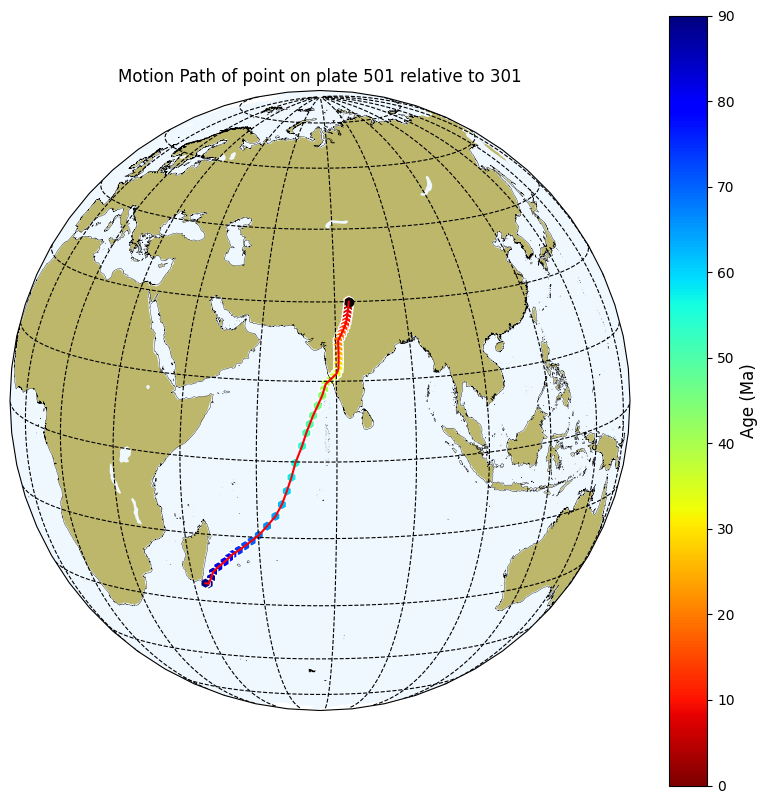

In [20]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import numpy as np
%matplotlib inline


# get the reconstructed plate geometry coordinates into numpy arrays
for reconstructed_motion_path in reconstructed_motion_paths:
    trail = reconstructed_motion_path.get_motion_path().to_lat_lon_array()

## Plotting - note that we use the median of the motion path coordinates as the map center
fig = plt.figure(figsize=(10,10), dpi=100)
ax_map = fig.add_subplot(111, projection=ccrs.Orthographic(central_longitude=np.median(trail[:,1]),
                                                           central_latitude=np.median(trail[:,0])))

ax_map.coastlines(resolution='10m', color='black', linewidth=0.25)
ax_map.add_feature(cfeature.LAND, color = 'darkkhaki', edgecolor='black')
ax_map.add_feature(cfeature.OCEAN, color='aliceblue')
ax_map.add_feature(cfeature.LAKES, color='aliceblue', edgecolor='black')

# Gives meridians and parallels
ax_map.gridlines(color='black',linestyle='--', xlocs=np.arange(0,360,15), ylocs=np.arange(-90,90,15))


#Plot the movement of point on the plate.
x, y = np.flipud(trail[:,1]), np.flipud(trail[:,0])
ax_map.plot(x[0],y[0],'ko', transform=ccrs.PlateCarree())
ax_map.plot(x,y,'r', transform=ccrs.PlateCarree())
l1=ax_map.scatter(x, y, 60, c=times, marker='h',
                          cmap=plt.cm.jet_r, edgecolor='w', transform=ccrs.PlateCarree())
ax_map.set_title('Motion Path of point on plate %d relative to %d' % (MovingPlate,RelativePlate))


# Set a colourbar to visualise the passage of time (Ma)
fig.colorbar(l1, ax=ax_map).set_label('Age (Ma)',fontsize=12)

# Show global projection and plot
ax_map.set_global()
plt.show()

In [21]:
import pygplates
import numpy as np
import sys
sys.path.append('../libs/')
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
%matplotlib inline

print('Everything successfully loaded.')

Everything successfully loaded.


In [22]:
# Code to obtain velocity vector field

# Takes the longitude and latitude, which are the flattened outputs of meshgrid(Xnodes,Ynodes), and returns a
# feature collection.
def make_GPML_velocity_feature(Long,Lat):

# function to make a velocity mesh nodes at an arbitrary set of points defined in Lat
# Long and Lat are assumed to be 1d arrays.

    # Obtain lat-lon pairs, format to floating-point and add them to a multipoint geometry
    multi_point = pygplates.MultiPointOnSphere([(float(lat),float(lon)) for lat, lon in zip(Lat,Long)])

    # Create a feature containing the multipoint feature, and defined as MeshNode type
    meshnode_feature = pygplates.Feature(pygplates.FeatureType.create_from_qualified_string('gpml:MeshNode'))
    meshnode_feature.set_geometry(multi_point)
    meshnode_feature.set_name('Velocity Mesh Nodes from pygplates')

    output_feature_collection = pygplates.FeatureCollection(meshnode_feature)

    # NB: at this point, the feature could be written to a file using
    # output_feature_collection.write('myfilename.gpmlz')

    # for use within the notebook, the velocity domain feature is returned from the function
    return output_feature_collection



# function to get velocites via pygplates. Returns the array of tuples "all_velocities" containing
# (magnitude, azimuth, inclination)
def get_plate_velocities(velocity_domain_features, topology_features,
                         rotation_model, time, delta_time, rep='vector_comp'):
    # All domain points and associated (magnitude, azimuth, inclination) velocities for the current time.
    all_domain_points = []
    all_velocities = []

    # Partition our velocity domain features into our topological plate polygons at the current 'time'.
    plate_partitioner = pygplates.PlatePartitioner(topology_features, rotation_model, time)
    for velocity_domain_feature in velocity_domain_features:
        # A velocity domain feature usually has a single geometry but we'll assume it can be any number.
        # Iterate over them all.
        for velocity_domain_geometry in velocity_domain_feature.get_geometries():
            for velocity_domain_point in velocity_domain_geometry.get_points():
                all_domain_points.append(velocity_domain_point)
                partitioning_plate = plate_partitioner.partition_point(velocity_domain_point)
                if partitioning_plate:
                    # We need the newly assigned plate ID to get the equivalent stage rotation of that tectonic plate.
                    partitioning_plate_id = partitioning_plate.get_feature().get_reconstruction_plate_id()
                    # Get the stage rotation of partitioning plate from 'time + delta_time' to 'time'.
                    equivalent_stage_rotation = rotation_model.get_rotation(time, partitioning_plate_id, time + delta_time)

                    # Calculate velocity at the velocity domain point.
                    # This is from 'time + delta_time' to 'time' on the partitioning plate.
                    velocity_vectors = pygplates.calculate_velocities(
                        [velocity_domain_point],
                        equivalent_stage_rotation,
                        delta_time)

                    if rep=='mag_azim':
                        # Convert global 3D velocity vectors to local (magnitude, azimuth, inclination) tuples (one tuple per point).
                        velocities = pygplates.LocalCartesian.convert_from_geocentric_to_magnitude_azimuth_inclination(
                            [velocity_domain_point],
                            velocity_vectors)
                        all_velocities.append(velocities[0])

                    elif rep=='vector_comp':
                        # Convert global 3D velocity vectors to local (magnitude, azimuth, inclination) tuples (one tuple per point).
                        velocities = pygplates.LocalCartesian.convert_from_geocentric_to_north_east_down(
                                [velocity_domain_point],
                                velocity_vectors)
                        all_velocities.append(velocities[0])
                else:
                    all_velocities.append((0,0,0))
    return all_velocities

def get_velocities(time,rotation_model,topology_filenames, delta_time = 5., Xnodes=[], Ynodes=[]):
    '''get velocity data

    Parameters
    ----------
    time: the reconstruction time
    rotation_model: the rotation model
    topology_filenames: the topology files
    delta_time: the time increment
    Xnodes, Ynodes: the coordinates of domain points

    Returns
    -------
    the coordinates of domain points and velocity data
    '''
    if len(Xnodes)==0 or len(Ynodes)==0:
        Xnodes = np.arange(-180,180,10)
        Ynodes = np.arange(-90,90,10)
    Xg,Yg = np.meshgrid(Xnodes,Ynodes)
    Xg = Xg.flatten()
    Yg = Yg.flatten()
    velocity_domain_features = make_GPML_velocity_feature(Xg,Yg)

    # Load the topological plate polygon features.
    topology_features = []
    for fname in topology_filenames:
        for f in pygplates.FeatureCollection(fname):
            topology_features.append(f)

    # Call the function we created above to get the velocities
    return Xnodes, Ynodes, get_plate_velocities(velocity_domain_features,
                                          topology_features,
                                          rotation_model,
                                          time,
                                          delta_time,
                                          'vector_comp')


def get_x_y_u_v(Xnodes, Ynodes, all_velocities):
    '''get velocity u,v components from velocity data

    Parameters
    ----------
    all_velocities: the velocity data
    Xnodes, Ynodes: the coordinates of domain points

    Returns
    -------
    the coordinates of domain points and velocity u, v components
    '''
    uu=[]
    vv=[]
    for vel in all_velocities:
        if not hasattr(vel, 'get_y'):
            uu.append(vel[1])
            vv.append(vel[0])
        else:
            uu.append(vel.get_y())
            vv.append(vel.get_x())
    u = np.asarray([uu]).reshape((Ynodes.shape[0],Xnodes.shape[0]))
    v = np.asarray([vv]).reshape((Ynodes.shape[0],Xnodes.shape[0]))

    return Xnodes, Ynodes, u, v


def get_velocity_x_y_u_v(time,rotation_model,topology_filenames, delta_time = 5., Xnodes=[], Ynodes=[]):
    '''get velocity data in x ,y, u, v form

    Parameters
    ----------
    time: the reconstruction time
    rotation_model: the rotation model
    topology_filenames: the topology files
    delta_time: the time increment
    Xnodes, Ynodes: the coordinates of domain points

    Returns
    -------
    the coordinates of domain points and velocity u, v components
    '''
    Xnodes, Ynodes, all_velocities = get_velocities(time,rotation_model,topology_filenames,
                                                    delta_time = 5., Xnodes=Xnodes, Ynodes=Ynodes)
    return get_x_y_u_v(Xnodes, Ynodes, all_velocities)





# Functions to plot velocity fields either using u,v or velocity_Data

def plot_velocities_uv(x,y,u,v,ax, alpha, scale):
    '''draw the velocity vectors in a map
    Some arrows are long and some are very short.
    To make the plot clearer, we nomalize the velocity magnitude and use color to denote the different speed.

    Parameters
    ----------
    x,y: the domain points coordinates
    u,v: the u and v component of the velocities
    ax: the matplotlib axes object

    Returns
    -------
    A colour bar object
    '''
    u = np.array(u)
    v = np.array(v)
    mag = np.sqrt(u*u+v*v)
    #mag[mag==0] = 1 #to avoid 0 divisor
    #u = u/mag
    #v = v/mag
    cb = ax.quiver(x, y, u, v, alpha=alpha, scale=scale, transform=ccrs.PlateCarree(),cmap='jet',zorder=100)
    return cb


def plot_velocities(x,y,velocities,ax, alpha, scale):
    '''draw the velocity vectors in a map
    Some arrows are long and some are very short.
    To make the plot clearer, we nomalize the velocity magnitude and use color to denote the different speed.

    Parameters
    ----------
    x,y: the domain points coordinates
    velocities: the velocity data
    ax: the matplotlib axes object

    Returns
    -------
    A colour bar object
    '''
    # x_ and y_ actually turn out to be Xnodes and Ynodes too
    x_,y_,u,v = get_x_y_u_v(x, y, velocities)
    return plot_velocities_uv(x_,y_,u,v,ax, alpha, scale)

In [23]:
# Plot velocities and topologies function
def plot_velocities_and_topologies(pmap,
                                   topology_features,
                                   rotation_model,
                                   time,
                                   delta_time=5,
                                   res=10,
                                   scale=2000,
                                   lon0=0,
                                   clip_path=None,
                                   alpha=0.4,
                                   MidOceanRidge_alpha=0.4,
                                   SubductionZone_alpha=0.4,
                                   FractureZone_alpha=0.4,
                                   quiver_alpha=0.4,
                                   MidOceanRidge_color='r',
                                   SubductionZone_color='k',
                                   FractureZone_color='b',
                                   MidOceanRidge_linewidth=3,
                                   SubductionZone_linewidth=3,
                                   FractureZone_linewidth=3,
                                   ):

    # Manually generate X and Y nodes to represent lon-lat points on a global sphere, and run them through meshgrid
    Xnodes = np.arange(-180,180,res)
    Ynodes = np.arange(-90,90,res)
    Xg,Yg = np.meshgrid(Xnodes,Ynodes)

    # Flatten the meshgrid outputs into 1D arrays to obtain the domain feature collection
    velocity_domain_features = make_GPML_velocity_feature(Xg.flatten(),Yg.flatten())

    # Call the function we created above to get the velocities
    all_velocities = get_plate_velocities(velocity_domain_features,
                                          topology_features,
                                          rotation_model,
                                          time,
                                          delta_time,
                                          'vector_comp')

    # The rest of the cell is for plotting, including rendering resolved topological boundaries to the map
    pt_vel_n=[]
    pt_vel_e=[]
    for vel in all_velocities:
        pt_vel_e.append(vel.get_y())
        pt_vel_n.append(vel.get_x())

    u = np.asarray(pt_vel_e).reshape((Ynodes.shape[0],Xnodes.shape[0]))
    v = np.asarray(pt_vel_n).reshape((Ynodes.shape[0],Xnodes.shape[0]))

    # Resolve our topological plate polygons (and deforming networks) to the current 'time'.
    # We generate both the resolved topology boundaries and the boundary sections between them.
    resolved_topologies = []
    shared_boundary_sections = []
    pygplates.resolve_topologies(topology_features, rotation_model, resolved_topologies, float(time), shared_boundary_sections)

    # create a dateline wrapper object
    wrapper = pygplates.DateLineWrapper(lon0)

    # Iterate over the shared boundary sections.
    for shared_boundary_section in shared_boundary_sections:

        # The shared sub-segments contribute either to the ridges or to the subduction zones.
        if shared_boundary_section.get_feature().get_feature_type() == pygplates.FeatureType.create_gpml('MidOceanRidge'):
            # Ignore zero length segments - they don't have a direction.
            for shared_sub_segment in shared_boundary_section.get_shared_sub_segments():
                split_geometry = wrapper.wrap(shared_sub_segment.get_geometry())
                for geometry in split_geometry:
                    X=[]
                    Y=[]
                    for point in geometry.get_points():
                        X.append(point.get_longitude()),Y.append(point.get_latitude())
                    #x,y = pmap(X,Y)
                    pmap.plot(X,Y,MidOceanRidge_color,clip_path=clip_path,linewidth=MidOceanRidge_linewidth,
                              alpha=MidOceanRidge_alpha, transform=ccrs.PlateCarree(), zorder=1)

        elif shared_boundary_section.get_feature().get_feature_type() == pygplates.FeatureType.create_gpml('SubductionZone'):
            for shared_sub_segment in shared_boundary_section.get_shared_sub_segments():
                split_geometry = wrapper.wrap(shared_sub_segment.get_geometry())
                for geometry in split_geometry:
                    X=[]
                    Y=[]
                    for point in geometry.get_points():
                        X.append(point.get_longitude()),Y.append(point.get_latitude())
                    #x,y = pmap(X,Y)
                pmap.plot(X,Y,SubductionZone_color,clip_path=clip_path,linewidth=SubductionZone_linewidth,
                          alpha=SubductionZone_alpha, transform=ccrs.PlateCarree(), zorder=1)

        else: #shared_boundary_section.get_feature().get_feature_type() == pygplates.FeatureType.create_gpml('FractureZone'):
            for shared_sub_segment in shared_boundary_section.get_shared_sub_segments():
                split_geometry = wrapper.wrap(shared_sub_segment.get_geometry())
                for geometry in split_geometry:
                    X=[]
                    Y=[]
                    for point in geometry.get_points():
                        X.append(point.get_longitude()),Y.append(point.get_latitude())
                    #x,y = pmap(X,Y)
                pmap.plot(X,Y,FractureZone_color,clip_path=clip_path,linewidth=FractureZone_linewidth,
                          alpha=FractureZone_alpha, transform=ccrs.PlateCarree(), zorder=1)


    # We have plotted the topologies of plate boundaries. Now plot the vector fields:
    plot_velocities(Xnodes, Ynodes, all_velocities, pmap, alpha, scale)

/usr/local/lib/python3.11/dist-packages/cartopy/crs.py:546: UserWarning: Some vectors at source domain corners may not have been transformed correctly


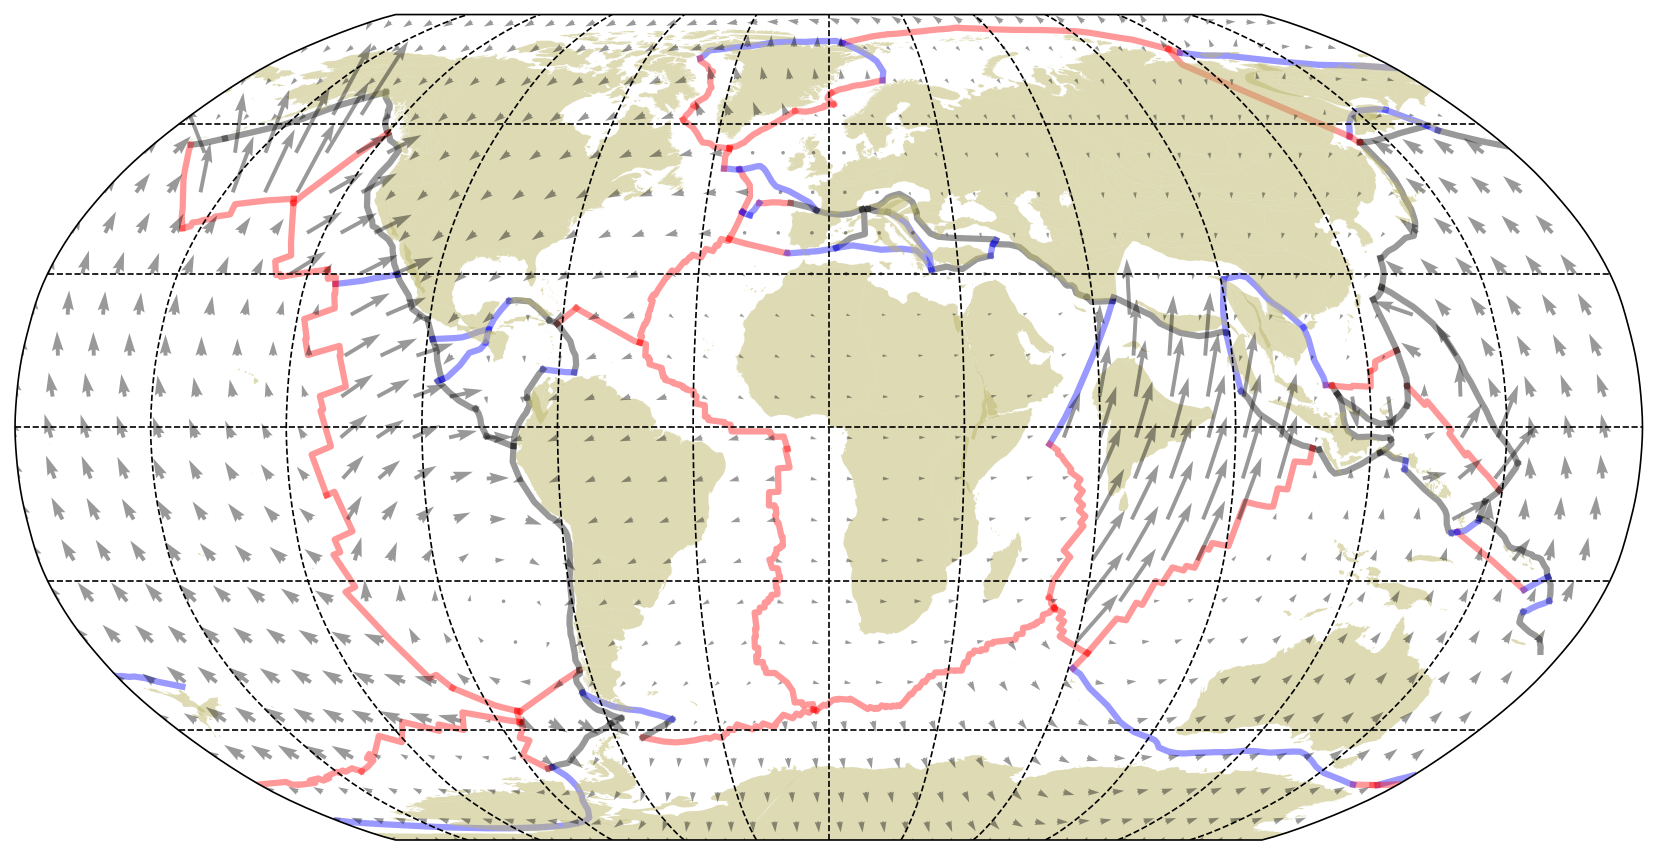

In [26]:
# Rotation and topology filenames
rotation_filename = 'data/Global_EarthByte_230-0Ma_GK07_AREPS.rot'
topology_features = ['data/Global_EarthByte_230-0Ma_GK07_AREPS_PlateBoundaries.gpmlz',\
             'data/Global_EarthByte_230-0Ma_GK07_AREPS_Topology_BuildingBlocks.gpmlz']

# Load one or more rotation files into a rotation model.
rotation_model = pygplates.RotationModel(rotation_filename)

# Reconstruction time
time=50

# Load the coastline gmpl file, and reconstruct it to the rotation model.
coastlines_file = 'data/Global_EarthByte_230-0Ma_GK07_AREPS_Coastlines.gpmlz'
pygplates.reconstruct(coastlines_file, rotation_model, '/tmp/tmp.shp', time, 1)

# Create the map plot, projection and set gridlines
fig = plt.figure(figsize=(14,10),dpi=150)
lon0=0
m = fig.add_subplot(111,projection=ccrs.Robinson(central_longitude=lon0))
m.gridlines(color='black',linestyle='--', xlocs=np.arange(-180,180,30), ylocs=np.arange(-90,90,30))

# Plot the reconstructed coastlines from the coastline shapefile
shp_info = shpreader.Reader('/tmp/tmp.shp')
poly = cfeature.ShapelyFeature(shp_info.geometries(), crs=ccrs.PlateCarree())
m.add_feature(poly, facecolor='DarkKhaki', edgecolor='none', alpha=0.5)

# Plot velocities and topologies using the function defined above
plot_velocities_and_topologies(m,topology_features,rotation_model,time,
                               delta_time=5,res=8,scale=4000,lon0=lon0)

# Set global extent and show plot
m.set_global()
plt.show()

In [27]:
#%%capture capt --no-stdout
time_step = 2.
oldest_seed_time = 10.

# Empty array for storing Long/Lat of
point_longitude = []
point_latitude = []


# Location of seed point for Kerguelen
hs_geometry = []
# Seed point for Kerguelen
hs_geometry.append(pygplates.PointOnSphere(-49, 69))
# Seed point for Hawaii
hs_geometry.append(pygplates.PointOnSphere(19, -155))
# Seed point for Reunion
hs_geometry.append(pygplates.PointOnSphere(-17, 59))
# Seed point for Iceland
hs_geometry.append(pygplates.PointOnSphere(64, -17))
# Seed point for Tristan
hs_geometry.append(pygplates.PointOnSphere(-37, -12))
# Seed point for Louisville
hs_geometry.append(pygplates.PointOnSphere(-54, -141))
# Seed point for Afar
hs_geometry.append(pygplates.PointOnSphere(7, 39))
# Seed point for Samoa
hs_geometry.append(pygplates.PointOnSphere(-15, -168))
# Seed point for Easter
hs_geometry.append(pygplates.PointOnSphere(-27, -110))
# Seed point for Crozet
hs_geometry.append(pygplates.PointOnSphere(-46, 50))
# Seed point for Ascension
hs_geometry.append(pygplates.PointOnSphere(-8, -14))
# Seed point for Tahiti
hs_geometry.append(pygplates.PointOnSphere(-18, -148))
# Seed point for Azores
hs_geometry.append(pygplates.PointOnSphere(38, -28))
# Seed point for Yellowstone
hs_geometry.append(pygplates.PointOnSphere(44, -111))

point_list = []

for time in np.arange(oldest_seed_time,0.,-time_step):

    print(f'working on time {time}')

    for hs_point in hs_geometry:
        point_list.append(hs_point)

    # Get the plate polygons for this time
    resolved_topologies = []
    shared_boundary_sections = []
    pygplates.resolve_topologies(topology_features, rotation_model, resolved_topologies, time, shared_boundary_sections)

    # make plate partitioner from polygons
    plate_partitioner = pygplates.PlatePartitioner(resolved_topologies, rotation_model)

    new_point_list = []
    point_longitude = []
    point_latitude = []
    for seed_geometry in point_list:
    # Find the plate id of the polygon that contains the point
        polygon = plate_partitioner.partition_point(seed_geometry)

        PlateID = polygon.get_feature().get_reconstruction_plate_id()
        #print PlateID

        # Get the stage rotation that will move the point from where it is at the current time
        # to its location at the next time step, based on the plate id that contains the point at the
        # current time
        stage_rotation = rotation_model.get_rotation(time-time_step, PlateID, time, anchor_plate_id=1)

        # use the stage rotation to reconstruct the tracked point from position at current time
        # to position at the next time step
        seed_geometry = stage_rotation * seed_geometry

        point_longitude.append(seed_geometry.to_lat_lon_point().get_longitude())
        point_latitude.append(seed_geometry.to_lat_lon_point().get_latitude())

        new_point_list.append(seed_geometry)

    point_list = new_point_list

    #### Plotting
    pygplates.reconstruct(coastlines_file, rotation_model, '/tmp/tmp.shp', time, 1)

    fig = plt.figure(figsize=(15,10),dpi=150)
    lon0=0
    m = fig.add_subplot(111,projection=ccrs.Robinson(central_longitude=lon0))
    m.gridlines(color='black',linestyle='--', xlocs=np.arange(-180,180,30), ylocs=np.arange(-90,90,30))
    m.add_feature(cfeature.OCEAN, color='white')


    # Plot reconstructed coastlines - filtering out small polygons by area may fix a coastline shapefile facecolor bug
    shp_info = shpreader.Reader('/tmp/tmp.shp').geometries()
    polygons=[]
    for geom in shp_info:
        if geom.area>1.5:
            polygons.append(geom)
    ft_coastline  = cfeature.ShapelyFeature(polygons, ccrs.PlateCarree())
    m.add_feature(ft_coastline, facecolor='DarkKhaki', edgecolor='none', alpha=0.5)

    # Plot plate velocity vectors and topological boundaries
    plot_velocities_and_topologies(m,topology_features,rotation_model,time,
                                   delta_time=5,res=8,scale=4000,lon0=lon0)

    # Plot point-trackers for the movements of several plate seed points
    for hs_point in hs_geometry:
        x,y = hs_point.to_lat_lon()[1],hs_point.to_lat_lon()[0]
        m.plot(x,y,'r*',markersize=20, transform=ccrs.PlateCarree(), zorder=1)

    x, y = point_longitude, point_latitude
    m.plot(x,y,'.',markersize=10, transform = ccrs.PlateCarree(), zorder=1)


    plt.title('Time = %d Ma' % time)
    m.set_global()
    #plt.show()

    plt.savefig('/tmp/plume_product_tracker_%d_Ma.png' % time)
    plt.close()

    print('Image for %d Ma saved' % time)

working on time 10.0


/usr/local/lib/python3.11/dist-packages/cartopy/crs.py:546: UserWarning: Some vectors at source domain corners may not have been transformed correctly


Image for 10 Ma saved
working on time 8.0


/usr/local/lib/python3.11/dist-packages/cartopy/crs.py:546: UserWarning: Some vectors at source domain corners may not have been transformed correctly


Image for 8 Ma saved
working on time 6.0


/usr/local/lib/python3.11/dist-packages/cartopy/crs.py:546: UserWarning: Some vectors at source domain corners may not have been transformed correctly


Image for 6 Ma saved
working on time 4.0


/usr/local/lib/python3.11/dist-packages/cartopy/crs.py:546: UserWarning: Some vectors at source domain corners may not have been transformed correctly


Image for 4 Ma saved
working on time 2.0


/usr/local/lib/python3.11/dist-packages/cartopy/crs.py:546: UserWarning: Some vectors at source domain corners may not have been transformed correctly


Image for 2 Ma saved


In [28]:
import moviepy.editor as mpy

frame_list = []

for time in np.arange(oldest_seed_time,0.,-time_step):
    frame_list.append('/tmp/plume_product_tracker_%d_Ma.png' % time)


clip = mpy.ImageSequenceClip(frame_list, fps=5)
clip.write_gif('/tmp/hotspot_trails.gif')

MoviePy - Building file /tmp/hotspot_trails.gif with imageio.


In [ ]:
from IPython.display import Image
print('The movie will show up in a few seconds. Please be patient...')
with open('/tmp/hotspot_trails.gif','rb') as f:
    display(Image(data=f.read(), format='png'))

In [33]:
# Setup code. Don't worry too much about this.
%matplotlib inline
import matplotlib.pyplot as plt
import pygplates
import sys
sys.path.append('../libs/')
# from tut import Tutorial
tutorial = Tutorial()

Reconstructing coastlines...
Plotting coastlines...
Resolving topologies
Plotting topologies...
Reconstructing fracture zones...
Plotting fracture zones...


TypeError: 'MultiLineString' object is not iterable

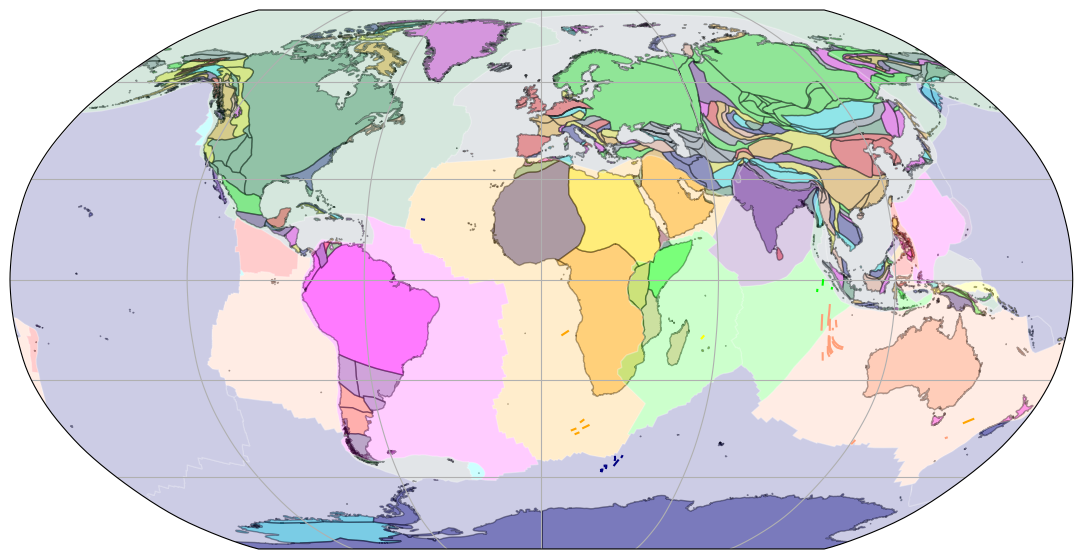

In [36]:
# Set up the figure
fig = plt.figure(figsize=(14,7))
#fig.add_axes([0,0,0.9,1.0])

# Projections are rectangular, mollweide or robinson
ax = tutorial.create_map('robinson')

# You can plot different layers of information. Just remove the # before the layer name.
layers = [
    'coastlines',
    #'continental_polygons',
    'topologies',
    'fracture',
    #'cob',
    #'velocities'
]

tutorial.plot_layers(layers, ax)
plt.show()

Reconstructing coastlines...
Plotting coastlines...
Resolving topologies
Plotting topologies...


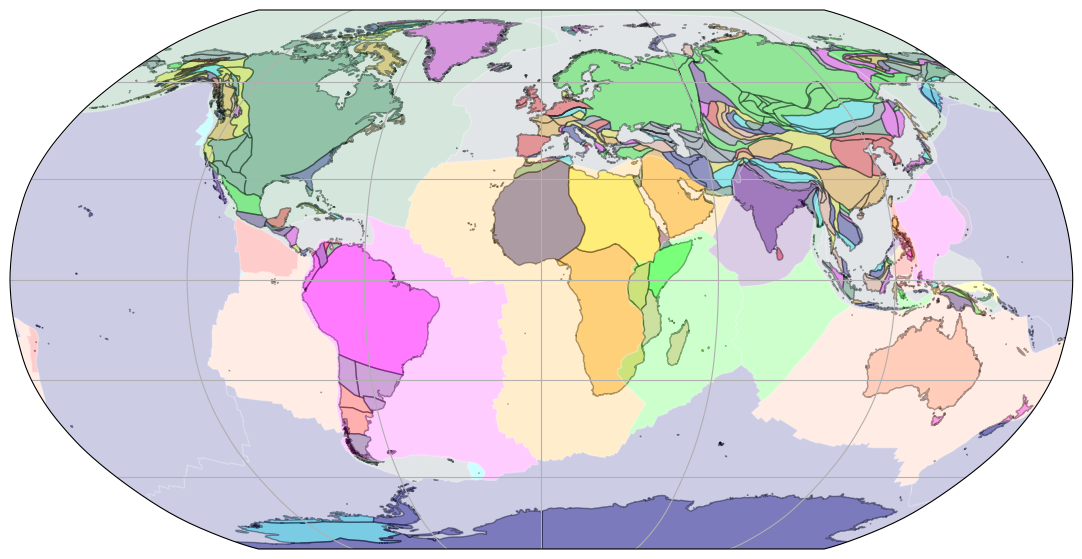

In [38]:
# Set up the figure
fig = plt.figure(figsize=(14,7))
#fig.add_axes([0,0,0.9,1.0])

# Projections are rectangular, mollweide or robinson
ax = tutorial.create_map('robinson')

# Remember, you can hide a layer by putting # in front of it
layers = [
    'coastlines',
    #'continental_polygons',
    'topologies',
    #'fracture',
    #'cob',
    #'velocities'
]

tutorial.plot_layers(layers, ax)

# You can specify a minimum magnitude to plot with something like
tutorial.plot_earthquakes(m, minmag=7.0)

# You can also specify a maximum magnitude with 'maxmag':
#tutorial.plot_earthquakes(m, maxmag=8.0)

# Or you can specify both:
# tutorial.plot_earthquakes(m, minmag=7.0, maxmag=8.0)

# By default, we plot all of them
# tutorial.plot_earthquakes(ax)
plt.show()